# Quantum Kernel Machine Learning

## Overview

The general task of machine learning is to find and study patterns in data. For many datasets, the datapoints are better understood in a higher dimensional feature space. This is the fundamental principle behind a series of machine learning algorithms known as *kernel methods*.

In this notebook, you will learn how to define quantum kernels using `qiskit-machine-learning` and how these can be plugged into different algorithms to solve classification and clustering problems.

All examples used in this tutorial are based on this reference paper: [_Supervised learning with quantum enhanced feature spaces_](https://arxiv.org/pdf/1804.11326.pdf).

The content is structured as follows:

1. [Introduction](#1.-Introduction)
2. [Classification](#2.-Classification)
3. [Clustering](#3.-Clustering)
4. [Kernel Principal Components Analysis](#4.-Kernel-Principal-Component-Analysis)
5. [Conclusion](#5.-Conclusion)

# 0. Import Backend

In [ ]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
#token = "79232e64fa632d6dc52dbcba74585a33ec8593fe06d654771e8e3805d1cfb4f029a8d2b4dc022194164e29c2c16746342a7abc849cac0e6d9b2a726ab4785731"
service = QiskitRuntimeService(channel = "ibm_quantum", token = token)
#complete code
all = service.backends()
print(all)


C:\Users\nfrey\AppData\Local\Temp\ipykernel_18004\3897213682.py:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService(channel = "ibm_quantum", token = token)


IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. This version of platform has been sunset. Create an account or sign in to the upgraded IBM Quantum Platform at https://quantum.cloud.ibm.com, Error code: 3447.'

In [7]:
backend = service.backend("ibm_brisbane")

NameError: name 'service' is not defined

In [45]:
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_brisbane
Version: 2
No. of qubits: 127



## 1. Introduction

### 1.1. Kernel Methods for Machine Learning

Kernel methods are a collection of pattern analysis algorithms that use kernel functions to operate in a high-dimensional feature space. The best-known application of kernel methods is in **Support Vector Machines (SVMs)**, supervised learning algorithms commonly used for classification tasks. The main goal of SVMs is to find decision boundaries to separate a given set of data points into classes. When these data spaces are not linearly separable, SVMs can benefit from the use of kernels to find these boundaries.

Formally, decision boundaries are hyperplanes in a high dimensional space. The kernel function implicitly maps input data into this higher dimensional space, where it can be easier to solve the initial problem. In other words, kernels may allow data distributions that were originally non-linearly separable to become a linearly separable problem. This is an effect known as the "kernel trick".

There are use-cases for kernel-based unsupervised algorithms too, for example, in the context of clustering. **Spectral Clustering** is a technique where data points are treated as nodes of a graph, and the clustering task is viewed as a graph partitioning problem where nodes are mapped to a space where they can be easily segregated to form clusters.

### 1.2. Kernel Functions

Mathematically, kernel functions follow:

$k(\vec{x}_i, \vec{x}_j) = \langle f(\vec{x}_i), f(\vec{x}_j) \rangle$

where 
* $k$ is the kernel function
* $\vec{x}_i, \vec{x}_j$ are $n$ dimensional inputs
* $f$ is a map from $n$-dimension to $m$-dimension space and 
* $\langle a,b \rangle$ denotes the inner product

When considering finite data, a kernel function can be represented as a matrix: 

$K_{ij} = k(\vec{x}_i,\vec{x}_j)$.

### 1.3. Quantum Kernels

The main idea behind quantum kernel machine learning is to leverage quantum feature maps to perform the kernel trick. In this case, the quantum kernel is created by mapping a classical feature vector $\vec{x}$ to a Hilbert space using a quantum feature map $\phi(\vec{x})$. Mathematically:

$K_{ij} = \left| \langle \phi(\vec{x}_i)| \phi(\vec{x}_j) \rangle \right|^{2}$

where 
* $K_{ij}$ is the kernel matrix
* $\vec{x}_i, \vec{x}_j$ are $n$ dimensional inputs
* $\phi(\vec{x})$ is the quantum feature map
* $\left| \langle a|b \rangle \right|^{2}$ denotes the overlap of two quantum states $a$ and $b$

Quantum kernels can be plugged into common classical kernel learning algorithms such as SVMs or clustering algorithms, as you will see in the examples below. They can also be leveraged in new quantum kernel methods like [QSVC](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.algorithms.QSVC.html) class  provided by `qiskit-machine-learning` which is explored in this tutorial, and other methods as shown in later tutorials on [Pegasos QSVC](07_pegasos_qsvc.ipynb) and [Quantum Kernel Training](08_quantum_kernel_trainer.ipynb).

***

Before introducing any example, we set up the global seed to ensure reproducibility:

## 2. Classification

This section illustrates a quantum kernel classification workflow using `qiskit-machine-learning`.

### 2.1. Defining the dataset

For this example, we will use the _ad hoc dataset_ as described in the reference [paper](https://arxiv.org/pdf/1804.11326.pdf). 

We can define the dataset dimension and get our train and test subsets:

In [2]:
!pip3 install qiskit_machine_learning


In [3]:
import matplotlib as plt

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [19]:
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
print("All imports complete and ready to go, Captain!")

All imports complete and ready to go, Captain!


In [ ]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size= 20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

In [26]:
print("train_featureas[0]: ", train_features[0])
print("train_labels[0]: ", train_labels[0])
print("test_features[0]: ", test_features[0])
print("test_labels[0]: ", test_labels[0])

print("train_features.shape: ", train_features.shape)
print("train_labels.shape: ", train_labels.shape)
print("test_features.shape: ", test_features.shape)
print("test_labels.shape: ", test_labels.shape)

train_featureas[0]:  [0.69115038 3.39292007]
train_labels[0]:  0
test_features[0]:  [4.33539786 3.0787608 ]
test_labels[0]:  0
train_features.shape:  (40, 2)
train_labels.shape:  (40,)
test_features.shape:  (10, 2)
test_labels.shape:  (10,)


In [21]:
#complete code
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)


(40, 2)
(40,)
(10, 2)
(10,)


This dataset is two-dimensional, the two features are represented by the $x$ and $y$ coordinates, and it has two class labels: A and B. We can plot it and see what the distribution looks like. We define utility functions to plot the dataset.

In [23]:
import matplotlib.pyplot as plt
import numpy as np


def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

Now we actually plot the dataset for classification:

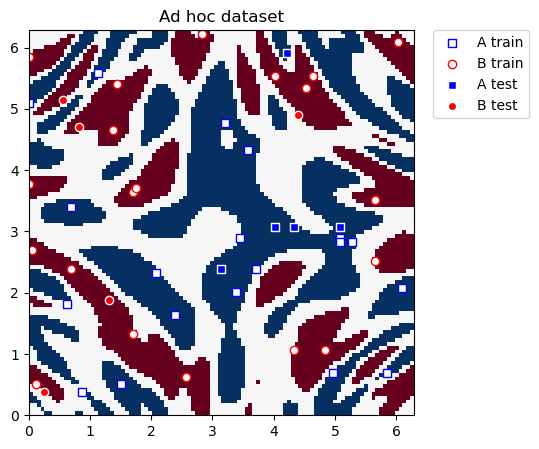

In [31]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)


### 2.2. Defining the quantum kernel

The next step is to create a quantum kernel instance that will help classify this data. 

We use the [FidelityQuantumKernel](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.kernels.FidelityQuantumKernel.html) class, and pass two input arguments to its constructor: 

1. `feature_map`: in this case, a two-qubit [ZZFeatureMap](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap).

2. `fidelity`: in this case, the [ComputeUncompute](https://qiskit-community.github.io/qiskit-algorithms/stubs/qiskit_algorithms.state_fidelities.ComputeUncompute.html) fidelity subroutine that leverages the [Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Sampler) primitive.

**NOTE:** If you don't pass a `Sampler` or `Fidelity` instance, then the instances of the reference `Sampler` and `ComputeUncompute` classes (found in `qiskit.primitives`) will be created by default.

In [33]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_ibm_runtime import qiskit_runtime_service, SamplerV2 as Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel

#complete code
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
#sampler = Sampler(backend)
#sampler = Sampler()
adhoc_kernel = FidelityQuantumKernel(feature_map=adhoc_feature_map)

In [11]:
print(adhoc_feature_map.decompose())

     ┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └─────────────┘└───┘└──────────────────────────────┘└───┘


In [37]:
#complete code
print(adhoc_kernel.evaluate)

<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x000001FC3D4CC690>>


### 2.3. Classification with SVC
The quantum kernel can now be plugged into classical kernel methods, such as the [SVC](https://scikit-learn.org/stable/modules/svm.html) algorithm from `scikit-learn`. This algorithm allows us to define a [custom kernel](https://scikit-learn.org/stable/modules/svm.html#custom-kernels) in two ways:

1. by providing the kernel as a **callable function**
2. by precomputing the **kernel matrix**

#### Kernel as a callable function

We define a SVC model and directly pass the `evaluate` function of the quantum kernel as a callable. Once the model is created, we train it by calling the `fit` method on the training dataset and evaluate the model for accuracy with `score`.

In [46]:
from sklearn.svm import SVC

#complete code
model = SVC(kernel=adhoc_kernel.evaluate) #callable function
model.fit(train_features, train_labels)


SVC(kernel=<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x000001FC3D4CC690>>)

In [48]:
score = model.score(test_features, test_labels)
print("Score: ", score)

Score:  1.0


#### Precomputed kernel matrix

Instead of passing a function of the quantum kernel as a callable, we can also precompute training and testing kernel matrices before passing them to the `scikit-learn` `SVC` algorithm. 

To extract the train and test matrices, we can call `evaluate` on the previously defined kernel and visualize them graphically as follows:

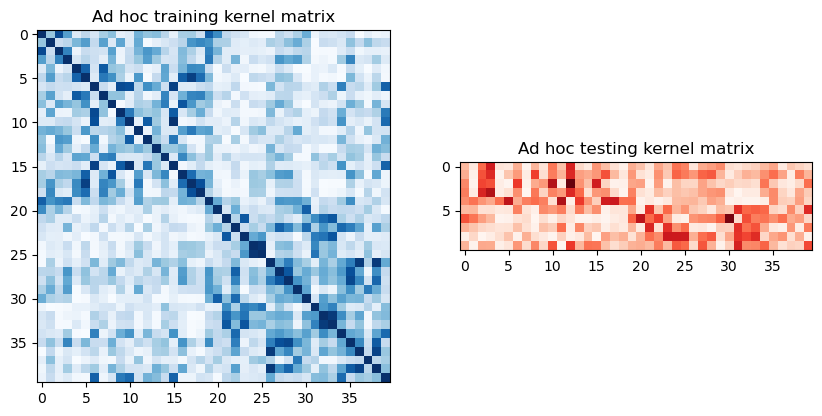

In [39]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)

adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features,y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()



In [40]:
print(adhoc_matrix_train[0][:5])
print(adhoc_matrix_train[0][-5:])

[1.         0.39111711 0.90023325 0.56476537 0.12948827]
[0.24407027 0.00354446 0.09749047 0.03732393 0.0608419 ]


To use these matrices, we set the `kernel` parameter of a new `SVC` instance to `"precomputed"`. We train the classifier by calling `fit` with the training matrix and training dataset. Once the model is trained, we evaluate it using the test matrix on the test dataset.

In [53]:
#complete the code ...
model = SVC(kernel="precomputed") 
model.fit(X=adhoc_matrix_train, y = train_labels)
 # Send kernel as a callable function

SVC(kernel='precomputed')

In [42]:
score = model.score(X=adhoc_matrix_test, y=test_labels)
print("score: ", score)

score:  1.0


In [56]:
#complete the code ...
print(adhoc_matrix_train[0][0])
print(adhoc_matrix_train[0][1])
print(adhoc_matrix_train[0][39])

print(adhoc_matrix_train)

0.9999999999999974
0.39111710693654755
0.06084190480673273
[[1.         0.39111711 0.90023325 ... 0.09749047 0.03732393 0.0608419 ]
 [0.39111711 1.         0.23010958 ... 0.42025875 0.27056078 0.23953435]
 [0.90023325 0.23010958 1.         ... 0.0898503  0.08747278 0.07352791]
 ...
 [0.09749047 0.42025875 0.0898503  ... 1.         0.28449158 0.34467761]
 [0.03732393 0.27056078 0.08747278 ... 0.28449158 1.         0.42360095]
 [0.0608419  0.23953435 0.07352791 ... 0.34467761 0.42360095 1.        ]]


### 2.4. Classification with QSVC

`QSVC` is an alternative training algorithm provided by `qiskit-machine-learning` for convenience. It is an extension of `SVC` that takes in a quantum kernel instead of the `kernel.evaluate` method shown before.

In [43]:
from qiskit_machine_learning.algorithms import QSVC

#complete the code
model_q = QSVC(quantum_kernel=adhoc_kernel) #simulator
model_q.fit(X=train_features, y = train_labels)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x000001FC3D4CC690>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [44]:
#complete code
score = model_q.score(X=test_features, y=test_labels)
print("score: ", score)

score:  1.0


#### 2.4.1 Compute this data with a simple SVC

In [60]:
#train_features, train labels, ...
from sklearn.svm import SVC

#complete code
model = SVC() #callable function
model.fit(train_features, train_labels)



SVC()

In [74]:
#complete code
score1 = model.score(X=test_features, y=test_labels)
print("score: ", score1)

score:  0.7


In [70]:
#train_features, train labels, ...
from sklearn.svm import SVC

#complete code
model = SVC(kernel="linear") #callable function
model.fit(train_features, train_labels)
#complete code
score2 = model.score(X=test_features, y=test_labels)
print("score: ", score2)

score:  0.7


In [69]:
#train_features, train labels, ...
from sklearn.svm import SVC

#complete code
model = SVC(kernel="sigmoid") #callable function
model.fit(train_features, train_labels)
#complete code
score3 = model.score(X=test_features, y=test_labels)
print("score: ", score3)

score:  0.9


### 2.5. Evaluation of models used for classification

In [75]:
print(f"Classification Model                    | Accuracy Score")
print(f"---------------------------------------------------------")
print(f"SVC                                     | {simple_score1:10.2f}")
print(f"SVC + Linear                            | {simple_score2:10.2f}")
print(f"SVC + Sigmoid                           | {simple_score3:10.2f}")
print(f"SVC using kernel as a callable function | {adhoc_score_callable_function:10.2f}")
print(f"SVC using precomputed kernel matrix     | {adhoc_score_precomputed_kernel:10.2f}")
print(f"QSVC                                    | {qsvc_score:10.2f}") 

#Adjust Variable Names

Classification Model                    | Accuracy Score
---------------------------------------------------------


NameError: name 'simple_score1' is not defined

As the classification dataset is small, we find that the three models achieve 100% accuracy.

## 3. Clustering

The second workflow in this tutorial focuses on a clustering task using `qiskit-machine-learning` and the spectral clustering algorithm from `scikit-learn`.

### 3.1. Defining the dataset

We will once again use the _ad hoc dataset_, but now generated with a higher gap of `0.6` (previous example: `0.3`) between the two classes. 

Note that clustering falls under the category of unsupervised machine learning, so a test dataset is not required.

In [5]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=25,
    test_size=0,
    n=adhoc_dimension,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [6]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print(adhoc_total.shape)

(50, 2)
(50,)
(0, 2)
(0, 2)
(100, 100)


 We plot the clustering dataset below:

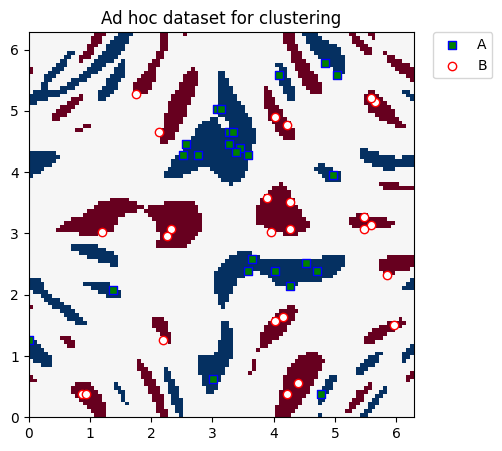

In [7]:
plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

# A label plot
plot_features(plt, train_features, train_labels, 0, "s", "g", "b", "A")

# B label plot
plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for clustering")

plt.show()

### 3.2. Defining the Quantum Kernel
We use an identical setup as in the classification example. We create another instance of the `FidelityQuantumKernel` class with a `ZZFeatureMap`.

In [8]:
#complete the code


### 3.3. Clustering with the Spectral Clustering Model

The `scikit-learn` spectral clustering algorithm allows us to define a custom kernel in two ways (just like `SVC`):

1. by providing the kernel as a **callable function**
2. by precomputing the **kernel matrix**. 

With the current `FidelityQuantumKernel` class in `qiskit-machine-learning`, we can only use the latter option, so we precompute the kernel matrix by calling `evaluate` and visualize it as follows:

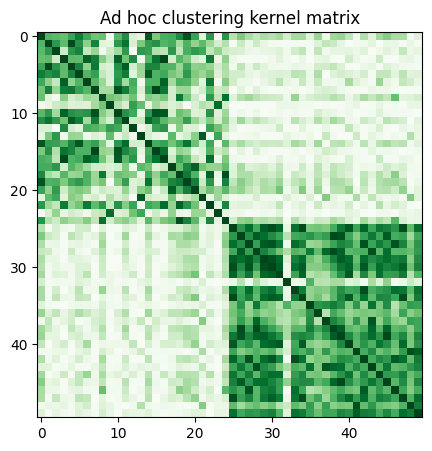

In [9]:
#complete the code for a callable fucntion

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

### 3.3.1 Difference Between Inner Product and Dot Product

#### Dot Product
- The **dot product** typically refers to the multiplication of two vectors.
- Given two vectors **$( u )$** and **$( v )$** in **$( \mathbb{R}^n )$**, the dot product is defined as:

  $[
  u \cdot v = \sum_{i=1}^{n} u_i v_i
  $]

- **Example Calculation**:
  
  $[
  u = [1, 2, 3], \quad v = [4, 5, 6]
  $]

  $[
  u \cdot v = (1 \times 4) + (2 \times 5) + (3 \times 6) = 4 + 10 + 18 = 32
  $]

- **Python Code Using NumPy**:
  ```python
  import numpy as np
  u = np.array([1, 2, 3])
  v = np.array([4, 5, 6])
  print(np.dot(u, v))  # Output: 32

# Homework:
- We know that the kernel do a inner product from the datasamples
- Where the feature map infuenciate on this inner product calculation? How? 

### Influence of Feature Maps on Inner Product Calculation

#### 1. Mapping Data to a Higher-Dimensional Space  
- A feature map $(\phi: X \to \mathcal{F})$ transforms an input $(x \in X$) into a higher-dimensional feature space $(\mathcal{F}$).  
- The inner product is then computed in this new space:  
  $[
  \langle \phi(x), \phi(y) \rangle
  $]
- This allows nonlinear relationships in the original space to be represented linearly in the transformed space.

#### 2. Kernel Trick & Computational Efficiency  
- Instead of explicitly computing $(\phi(x)$), kernel functions $(K(x, y)$) compute the inner product directly:  
  $[
  K(x, y) = \langle \phi(x), \phi(y) \rangle
  $]
- This avoids the need to compute high-dimensional transformations explicitly, reducing computational complexity.

#### 3. Effect on Similarity Measures  
- The choice of feature map affects how similarity is measured.  
- For example, a **polynomial feature map** changes the geometric interpretation of distances between points.

Next, we define a spectral clustering model and fit it using the precomputed kernel. Further, we score the labels using normalized mutual information, since we know the class labels a priori (before hand).

In [12]:
#use cluster with kernel matrix
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

#complete the code


Clustering score: 1.0


In [ ]:
#use cluster with kernel callable function
#complete the code


In [ ]:
# do the clustering with affinity="rgb" (default value) and compare all 3 cluster models 
#complete the code


In [ ]:
# do the clustering with affinity="rgb" (default value) and compare all 3 cluster models 
#complete the code


In [17]:
#Change what it need to be changed
print(f"Clusering Model                                | Accuracy Score")
print(f"---------------------------------------------------------")
print(f"Clustering kernel matrix                       | {cluster_score:10.2f}")
print(f"Clustering using kernel as a callable function | {cluster_score_callable:10.2f}")
print(f"Clustering using rbf                           | {cluster_score_rbf_callale:10.2f}")
print(f"Clustering using rbf + kernel matrix           | {cluster_score_rbf:10.2f}")


Clusering Model                                | Accuracy Score
---------------------------------------------------------
Clustering kernel matrix                       |       1.00
Clustering using kernel as a callable function |       1.00
Clustering using rbf                           |       0.01
Clustering using rbf + kernel matrix           |       1.00


## 4. Kernel Principal Component Analysis

This section focuses on a Principal Component Analysis task using a kernel PCA algorithm. We calculate a kernel matrix using a `ZZFeatureMap` and show that this approach translates the original features into a new space, where axes are chosen along principal components. In this space the classification task can be performed with a simpler model rather than an SVM.

### 4.1. Defining the dataset

We again use the _ad hoc dataset_ with a gap of `0.6` between the two classes. This dataset resembles the dataset we had in the clustering section, the difference is that in this case `test_size` is not zero.

In [4]:
#complete the code
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=25,
    test_size=10,
    n=adhoc_dimension,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

We plot the training and test datasets below. Our ultimate goal in this section is to construct new coordinates where the two classes can be linearly separated.

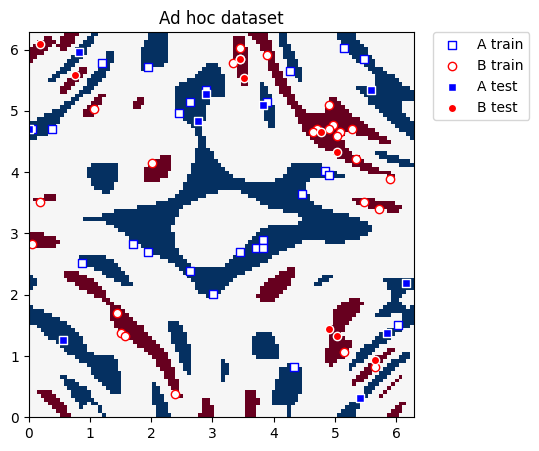

In [7]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

### 4.2. Defining the Quantum Kernel

We proceed with the same kernel setup as it was in the classification task, namely a `ZZFeatureMap` circuit as a feature map and an instance of `FidelityQuantumKernel`.

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")
qpca_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

Then, we evaluate kernel matrices for the training and test features.

In [ ]:
#complete the code
matrix_train = qpca_kernel.evaluate(x_vec=train_features)
matrix_test = qpca_kernel.evaluate(x_vec=test_features, y_vec=train_features)

In [ ]:
#complete the code ...


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

### 4.3. Comparison of Kernel PCA on gaussian and quantum kernel

In this section we use the `KernelPCA` implementation from `scikit-learn`, with the `kernel` parameter set to "rbf" for a gaussian kernel and "precomputed" for a quantum kernel. The former is very popular in classical machine learning models, whereas the latter allows using a quantum kernel defined as `qpca_kernel`.

One can observe that the gaussian kernel based Kernel PCA model fails to make the dataset linearly separable, while the quantum kernel succeeds.

While usually PCA is used to reduce the number of features in a dataset, or in other words to reduce dimensionality of a dataset, we don't do that here. Rather we keep the number of dimensions and employ the kernel PCA, mostly for visualization purposes, to show that classification on the transformed dataset becomes easily tractable by linear methods, like logistic regression. We use this method to separate two classes in the principal component space with a `LogisticRegression` model from `scikit-learn`. As usual we train it by calling the `fit` method on the training dataset and evaluate the model for accuracy with `score`.

#### Classical PCA

In [ ]:
from sklearn.decomposition import KernelPCA

#complete the code
kernel_pca_rbf = KernelPCA(n_components=2, kernel="rbf")
kernel_pca_rbf.fit(train_features)
train_features_rbf = kernel_pca_rbf.transform(train_features)
test_features_rbf = kernel_pca_rbf.transform(test_features)



KernelPCA(kernel='rbf', n_components=2)

In [ ]:
#complete code
print(train_features_rbf.shape)
print(test_features_rbf.shape)


train_features = (50, 2)
test_features = (20, 2)


In [ ]:
#complete code


#### Classical PCA precomputed + Quantum Kernel

In [ ]:
#complete code
from sklearn.decomposition import KernelPCA

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix_train)
test_features_q = kernel_pca_q.transform(matrix_test)

In [ ]:
#complete code

print(train_features_q.shape)
print(test_features_q.shape)

train_features = (50, 2)
test_features = (20, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

#complete the code
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_q, train_labels)

logistic_score = logistic_regression.score(test_features_q, test_labels)
print(f"Logistic regression score: {logistic_score}")

0.95


#### Classical PCA + Quantum Kernel as a function

In [ ]:
kernelpca_q_function = KernelPCA(n_components=2, kernel=adhoc_kernel.evaluate)
train_features_q_function = kernelpca_q_function.fit_transform(train_features) # error #Should be matrix_traiin
test_features_q_function = kernelpca_q_function.fit_transform(test_features) # error #Should be matrix_test

#complete the code
LR = LogisticRegression()
LR.fit(train_features_q_function, train_labels)
classical_function_q_score = LR.score(test_features_q_function, test_labels)
print(classical_function_q_score)

#### Classical PCA rbf + Quantum Kernel

In [ ]:
kernelpca_q = KernelPCA(n_components=2, kernel="rbf")
train_features_q_rbf = kernelpca_q.fit_transform(adhoc_matrix_train)
test_features_q_rbf = kernelpca_q.fit_transform(adhoc_matrix_test) #correct this error

#Corrected error code
#If using kernel="rbf" then kerel matrix is not needed
train_features_q_rbf = kernelpca_q.fit_transform(train_features)
test_features_q_rbf = kernelpca_q.fit_transform(test_features)



#complete the code
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_q, train_labels)

logistic_score = logistic_regression.score(test_features_q_rbf, test_labels)
print(f"Logistic regression score: {logistic_score}")

0.95


Let's plot the results. First, we plot the transformed dataset we get with the quantum kernel. On the same plot we also add model results. Then, we plot the transformed dataset we get with the gaussian kernel.

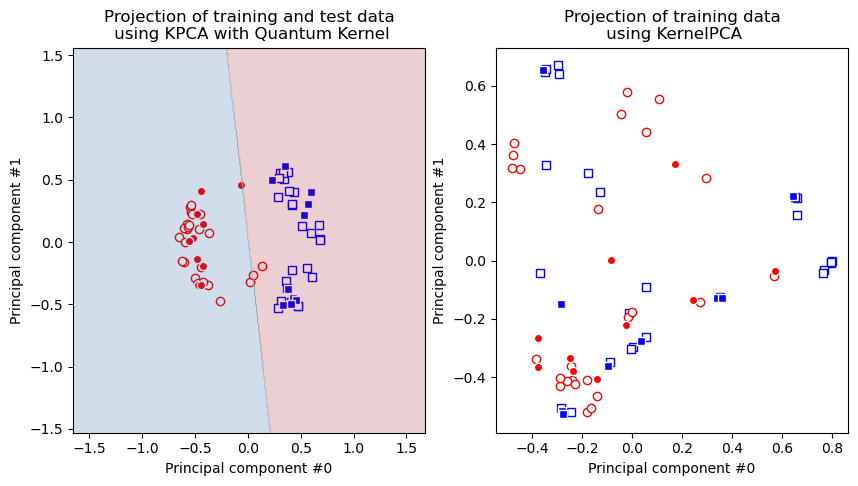

In [ ]:
fig, (q_ax, rbf_ax) = plt.subplots(1, 2, figsize=(10, 5))


plot_features(q_ax, train_features_q, train_labels, 0, "s", "w", "b", "A train")
plot_features(q_ax, train_features_q, train_labels, 1, "o", "w", "r", "B train")

plot_features(q_ax, test_features_q, test_labels, 0, "s", "b", "w", "A test")
plot_features(q_ax, test_features_q, test_labels, 1, "o", "r", "w", "A test")

q_ax.set_ylabel("Principal component #1")
q_ax.set_xlabel("Principal component #0")
q_ax.set_title("Projection of training and test data\n using KPCA with Quantum Kernel")

# Plotting the linear separation
h = 0.01  # step size in the mesh

# create a mesh to plot in
x_min, x_max = train_features_q[:, 0].min() - 1, train_features_q[:, 0].max() + 1
y_min, y_max = train_features_q[:, 1].min() - 1, train_features_q[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predictions = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
predictions = predictions.reshape(xx.shape)
q_ax.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.2)

plot_features(rbf_ax, train_features_rbf, train_labels, 0, "s", "w", "b", "A train")
plot_features(rbf_ax, train_features_rbf, train_labels, 1, "o", "w", "r", "B train")
plot_features(rbf_ax, test_features_rbf, test_labels, 0, "s", "b", "w", "A test")
plot_features(rbf_ax, test_features_rbf, test_labels, 1, "o", "r", "w", "A test")

rbf_ax.set_ylabel("Principal component #1")
rbf_ax.set_xlabel("Principal component #0")
rbf_ax.set_title("Projection of training data\n using KernelPCA")
plt.show()

As we can see, the data points on the right figure are not separable, but they are on the left figure, hence in case of quantum kernel we can apply linear models on the transformed dataset and this is why SVM classifier works perfectly well on the _ad hoc_ dataset as we saw in the [classification section](#2.-Classification).

## 5. Conclusion

In this tutorial:

* We reviewed the fundamentals of quantum kernel learning
* We understood how to define quantum kernels as instances of `FidelityQuantumKernel`
* We learned how to use the `scikit-learn` `SVC` algorithm with a custom quantum kernel as a callable function vs precomputed quantum kernel matrix for classification
* We learned how to train classifiers with the `QSVC` algorithm from `qiskit-machine-learning`
* We learned how to use the `scikit-learn` `SpectralClustering` algorithms with a precomputed quantum kernel matrix for clustering
* We investigated how to plug in a quantum kernel into `scikit-learn`'s `KernelPCA` algorithm and transform the ad-hoc dataset into a new one that can be tackled by a linear model.

For further reference, `scikit-learn` has other algorithms that can use a precomputed kernel matrix, such as:

- [Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- [Support vector regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)
- [Gaussian process regression](https://scikit-learn.org/stable/modules/gaussian_process.html)

In [ ]:
import tutorial_magics

%qiskit_version_table
%qiskit_copyright